<a href="https://colab.research.google.com/github/Denisganga/the_plant_doctor/blob/main/The_plant_doctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#importing the required modules
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import torchvision.transforms as transforms
import torchvision.models as model
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchvision import datasets
from torch.utils.data import random_split
import numpy as np
import random
import torchvision

In [ ]:
#unzipping my dataset
import zipfile

zip_file_path =  "/content/drive/My Drive/the_plant_doctor/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
# Define the data directory (the path where your unzipped dataset is located)
data_dir="/content/dataset"

In [ ]:
#setup device agnostic code(using the GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Define the transformations
data_transforms = transforms.Compose([
    # Make the model more robust to differently oriented images.
    transforms.RandomRotation(degrees=15),

    # Random cropping of images to create multiple views of the same image
    transforms.RandomCrop(size=(224, 224), padding=10),

    # Apply random color transformations to the images to make the model more invariant to changes in lighting and color
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),

    # Resize and crop the image to create variations in the field of view.
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),

    # Introduce controlled occlusions or "erasing" of parts of the image during training
    # transforms.RandomErasing(),

    # Randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),

    # Randomly flip the image vertically
    transforms.RandomVerticalFlip(),

    # Convert the image to a PyTorch tensor
    transforms.ToTensor(),

    # Normalize the image based on typical RGB mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
#create a dataset using ImageFolder
dataset= datasets.ImageFolder(data_dir, transform=data_transforms)

In [ ]:
# Define class labels based on the dataset structure
classes = dataset.classes

In [ ]:
#splitting the dataset into training and testing sets
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset,[train_size, test_size])

In [ ]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

41276
33020
8256


In [ ]:

#see the first training sample
image, label = train_dataset[0]
image, label

(tensor([[[-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
          [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
          [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
          ...,
          [ 0.6221,  0.6392,  0.8447,  ...,  0.8447,  0.6049,  0.7248],
          [ 0.8618,  1.0159,  1.2043,  ...,  0.6392,  0.2282,  1.1700],
          [ 0.9303,  1.1529,  1.1529,  ...,  0.5022,  0.6734,  1.5297]],
 
         [[-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
          [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
          [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
          ...,
          [ 0.8529,  0.8704,  1.0630,  ...,  1.0280,  0.7829,  0.9055],
          [ 1.0630,  1.2381,  1.4307,  ...,  0.8179,  0.4153,  1.3606],
          [ 1.1506,  1.3782,  1.3606,  ...,  0.6779,  0.8529,  1.7283]],
 
         [[-1.5779, -1.5779, -1.5779,  ..., -1.5779, -1.5779, -1.5779],
          [-1.5779, -1.5779,

In [ ]:
image.shape

torch.Size([3, 224, 224])

In [ ]:
# See classes
class_names = dataset.classes

class_names

['PlantVillage', 'plantvillage']

In [ ]:

#contents of plantvillages and PlantVillages directories
import os

# Define the paths to the "PlantVillage" and "plantvillage" directories
plant_village_path = os.path.join(data_dir, "PlantVillage")
plant_village_lower_path = os.path.join(data_dir, "plantvillage")

# List the subdirectories within "PlantVillage"
plant_village_classes = os.listdir(plant_village_path)

# List the subdirectories within "plantvillage"
plant_village_lower_classes = os.listdir(plant_village_lower_path)

print("Classes in 'PlantVillage':", plant_village_classes)
print("Classes in 'plantvillage':", plant_village_lower_classes)

Classes in 'PlantVillage': ['Potato___Early_blight', 'Tomato_Leaf_Mold', 'Pepper__bell___healthy', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___Bacterial_spot']
Classes in 'plantvillage': ['PlantVillage']


In [ ]:
# Define the path to the "PlantVillage" directory
plant_village_dir = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
plant_village_subclasses = os.listdir(plant_village_dir)

# Print the class labels within "PlantVillage"
print("Subclasses in 'PlantVillage':", plant_village_subclasses)

Subclasses in 'PlantVillage': ['Potato___Early_blight', 'Tomato_Leaf_Mold', 'Pepper__bell___healthy', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___Bacterial_spot']


In [ ]:
len(plant_village_classes)

15

In [ ]:
#create a Dataloader for efficient dataloading and batch, turning datasets into batches
batch_size = 32
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#lets checkout what we have created
print(f"the data loaders are:{test_data_loader,train_data_loader}")
print(f"the length of train dataloader:{len(train_data_loader)} batches of {batch_size}")
print(f"the length of test dataloader:{len(test_data_loader)} batches of {batch_size}")

the data loaders are:(<torch.utils.data.dataloader.DataLoader object at 0x7e2afa9a6f80>, <torch.utils.data.dataloader.DataLoader object at 0x7e2afa9a6bf0>)
the length of train dataloader:1032 batches of 32
the length of test dataloader:258 batches of 32


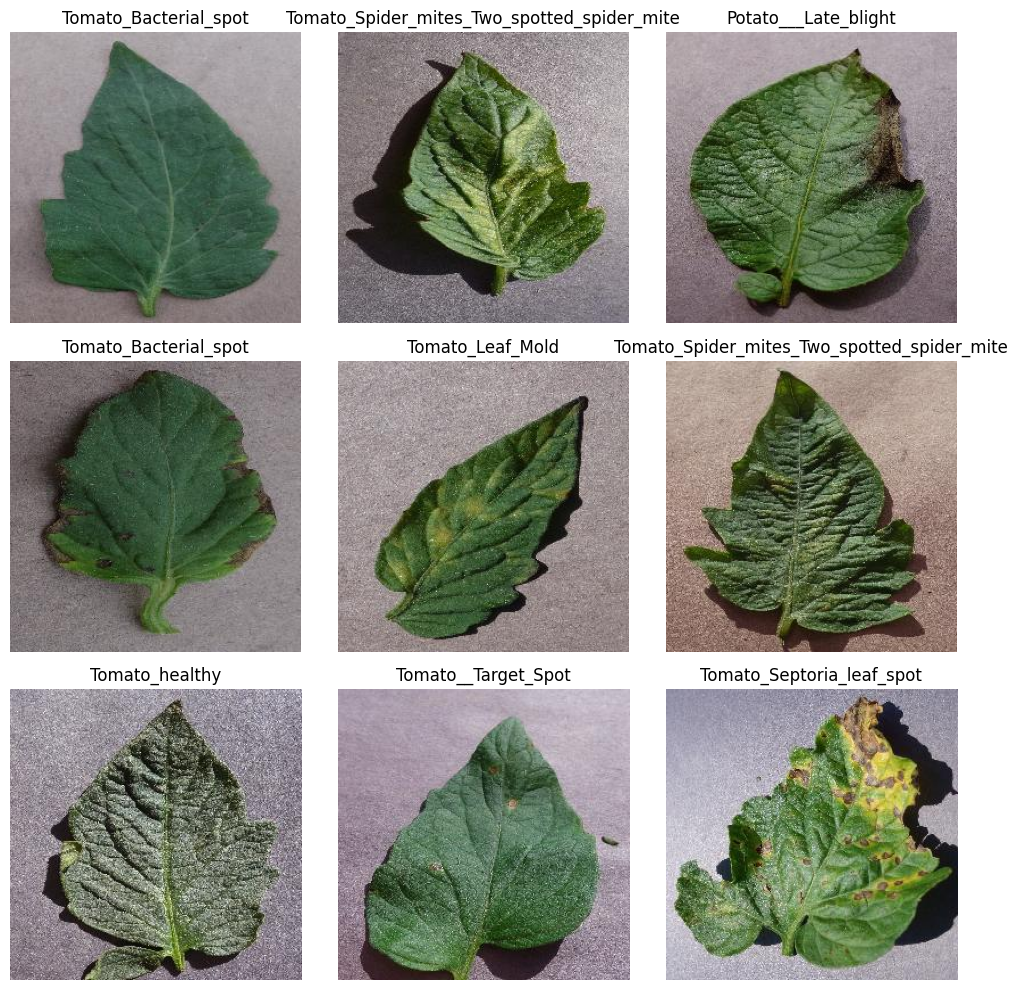

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the "PlantVillage" directory
plant_village_path = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
class_labels = os.listdir(plant_village_path)

# Create a 3x3 grid to display random images
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows * num_cols):
    # Randomly select a class label
    random_label = random.choice(class_labels)

    # Find a random image within the class directory
    class_dir = os.path.join(plant_village_path, random_label)
    image_files = os.listdir(class_dir)
    random_image_file = os.path.join(class_dir, random.choice(image_files))
    random_image = Image.open(random_image_file)

    # Plot the image
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(random_image)
    axes[row, col].set_title(random_label)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


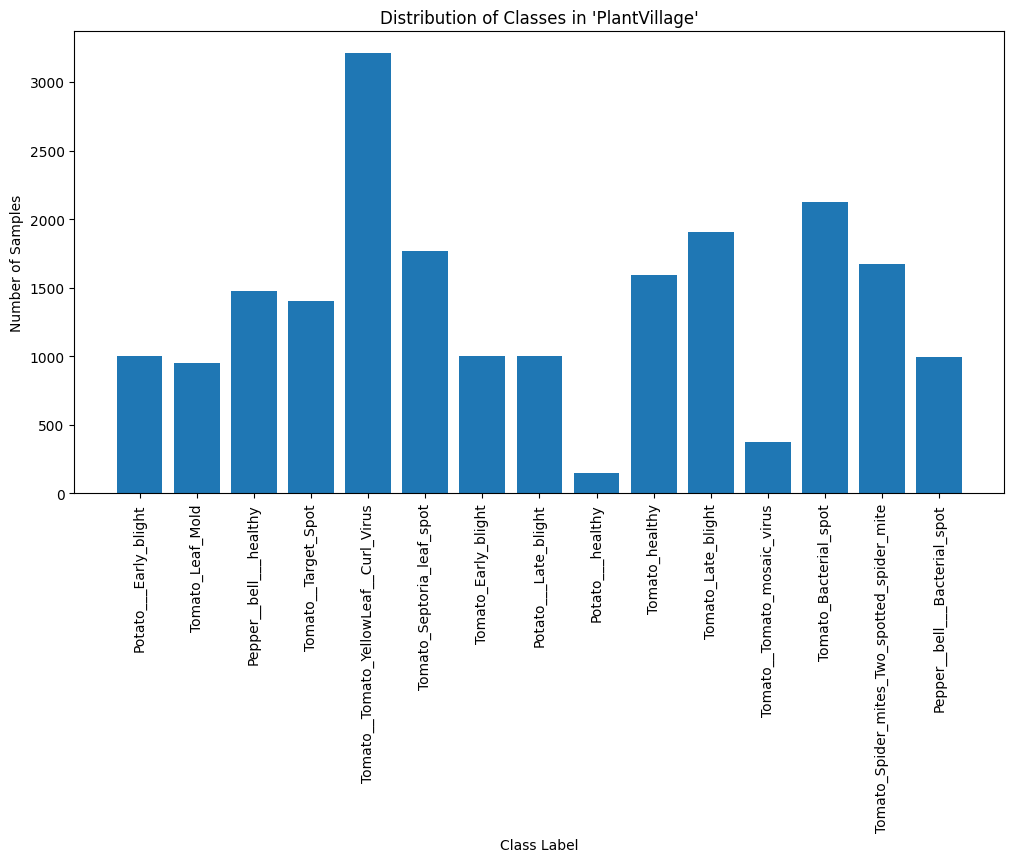

In [ ]:

# Count the number of samples in each class
class_counts = [ len(os.listdir(os.path.join(plant_village_path, class_label))) for class_label in class_labels]

# Create a bar chart (histogram) to visualize the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in 'PlantVillage'")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import torch.nn.functional as F
# Define model
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


In [ ]:
# Create an instance of the model
model = TheModelClass()

# Load the state dictionary
state_dict = torch.load('fine_tuned_resnet18.pth')

# Load the state dictionary into the existing model
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
#import the resnet18 pretrained model, and optimizer
import torch.optim as optim
from torchvision.models import resnet18
import torchvision.models as models

In [ ]:
#Load the pretrained ResNet-18 model
model = models.resnet18(pretrained=True)

In [ ]:
#freeze the pretrained layer
for param in model.parameters():
  param.requires_grad= False

In [ ]:
# modifying the output layer for the specific task
num_classes = 15 #number of classes

#modify the final fully connected (fc) layer of ResNet-18 model to match the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

In [ ]:
#set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.fc.parameters(),lr=0.001, momentum=0.9)#standard choices

In [ ]:
#learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2,gamma=0.1)

In [ ]:
#Define the EarlyStopping callback
class EarlyStopping:
  def __init__(self, patience=5,delta=0.01):
    self.patience = patience
    self.delta = delta
    self.counter = 0
    self.best_accuracy = None
    self.early_stop = False
  def __call__(self,current_accuracy):
    if self.best_accuracy is None:
      self.best_accuracy = current_accuracy
    elif current_accuracy < self.best_accuracy - self.delta:
      self.counter += 1
      if self.counter >= self.patience:
        self.early_stop = True

    else:
      self.best_accuracy
      self.counter = 0

    return self.early_stop




In [ ]:
#set random seed for reproducibility
torch.manual_seed(0)

#initialize the EarlyStopping callback
early_stopping = EarlyStopping(patience=5, delta =0.01)

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    # Train the model for the specified number of epochs
    for epoch in range(num_epochs):
        # Set the model to train mode
        model.train()

        # Initialize the running loss and accuracy
        running_loss = 0.0
        running_corrects = 0

        # Iterate over the batches of the train loader
        for inputs, labels in train_loader:
            # Move the inputs and labels to the device
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the optimizer gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # Backward pass and optimizer step
            loss.backward()
            optimizer.step()

            # Update the running loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        # Calculate the train loss and accuracy
        train_loss = running_loss / len(train_dataset)
        train_acc = running_corrects.double() / len(train_dataset)

        # Set the model to evaluation mode
        model.eval()

        # Initialize the running loss and accuracy
        running_loss = 0.0
        running_corrects = 0

        # Iterate over the batches of the validation loader
        with torch.no_grad():
            for inputs, labels in val_loader:
                # Move the inputs and labels to the device
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # Update the running loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

        # Calculate the validation loss and accuracy
        val_loss = running_loss / len(test_dataset)
        val_acc = running_corrects.double() / len(test_dataset)

        # Print the epoch results
        print('Epoch [{}/{}], train loss: {:.4f}, train acc: {:.4f}, val loss: {:.4f}, val acc: {:.4f}'
              .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))



In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Fine-tune the last layer for a few epochs
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)
train(model, train_data_loader, test_data_loader, criterion, optimizer, num_epochs=10)

# Unfreeze all the layers and fine-tune the entire network for a few more epochs
for param in model.parameters():
    param.requires_grad = True
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train(model, train_data_loader, test_data_loader, criterion, optimizer, num_epochs=20)


Epoch [1/10], train loss: 1.1381, train acc: 0.4955, val loss: 1.4523, val acc: 0.5005
Epoch [2/10], train loss: 1.1370, train acc: 0.5021, val loss: 0.8399, val acc: 0.4995
Epoch [3/10], train loss: 1.1344, train acc: 0.4956, val loss: 2.0228, val acc: 0.4985
Epoch [4/10], train loss: 1.1657, train acc: 0.5005, val loss: 1.3945, val acc: 0.5006
Epoch [5/10], train loss: 1.1155, train acc: 0.4997, val loss: 1.0407, val acc: 0.5022


In [ ]:
#mapping the class labels before making predictions
class_name_mapping ={
    0:"Pepper__bell__Bacteria",
    1:"Pepper__bell__healthy",
    2:"Potato___Early_blight",
    3:"Potato___Late_blight",
    4:"Potato___healthy",
    5:"Tomato_Bacterial_spot",
    6:"Tomato_Early_blight",
    7:"Tomato_Late_blight",
    8:"Tomato_Leaf_Mold",
    9:"Tomato_Septoria_leaf_spot_spot",
    10:"Tomato_Spider_mites_Two_spotted_spider_mite",
    11:"Tomato__Target_spot",
    12:"Tomato__Tomato_YellowLeaf__Curl_Virus_spot",
    13:"Tomato__Tomato_mosaic_virus_spot",
    14:"Tomato_healthy_spot"


}

In [ ]:
print(model)

In [ ]:
print(model.fc)

Linear(in_features=512, out_features=15, bias=True)


In [ ]:
#model evaluation
#initialize variables for evaluation
validation_loss=0.0
correct_predictions=0
total_samples=0

#use your test data loader for evaluation
with torch.no_grad():
  for inputs, labels in test_data_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs =model(inputs)
    loss = criterion(outputs,labels)
    validation_loss += loss.item()

    _, predicted = torch.max(outputs,  1)
    total_samples  +=labels.size(0)
    correct_predictions += (predicted == labels).sum().item()

#calculate the accuracy
accuracy= correct_predictions / total_samples

# Print validation loss and accuracy
print(f"Validation Loss: {validation_loss / len(test_data_loader)}")
print(f"Accuracy on Test Data: {100 * accuracy:.2f}%")

In [ ]:
# lets save the model
torch.save(model.state_dict(), 'fine_tuned_resnet18.pth')